In [11]:
from gensim.models import word2vec
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Hannanum 
import pandas as pd
from collections import Counter
from wordcloud import WordCloud

In [2]:
okt = Okt()
f = open('d:/data/project/kr3.tsv',encoding='UTF-8')
data = f.read(400000)

lines = data.split('\n')
results = []
for line in lines:
    r = []
    word_list = okt.pos(line,norm = True, stem=True)
    for (word,pumsa) in word_list:
        if not pumsa in ['Josa','Eomi','Punctuation']:
            r.append(word)
        r.append(word)
    results.append((' '.join(r)).strip())

output = (' '.join(results)).strip()
with open('d:/data/project/text_prepared.dat','w',encoding='UTF-8') as fp:
    fp.write(output)
print('작업완료')

작업완료


In [3]:
data = word2vec.LineSentence('d:/data/project/text_prepared.dat')
model = word2vec.Word2Vec(data, vector_size=100, window=10, hs=1, min_count=2, sg=1)
model.save('d:/data/project/text_100.model')
print('word2vec 모델 생성 완료')

word2vec 모델 생성 완료


In [4]:
text = open('d:/data/project/kr3.tsv', encoding='UTF-8').read(400000)
wordcloud = WordCloud(font_path = 'c/Windows/Fonts/malgun.ttf').generate(text)
wordcloud.words_
print('wordcloud 생성 완료')

wordcloud 생성 완료


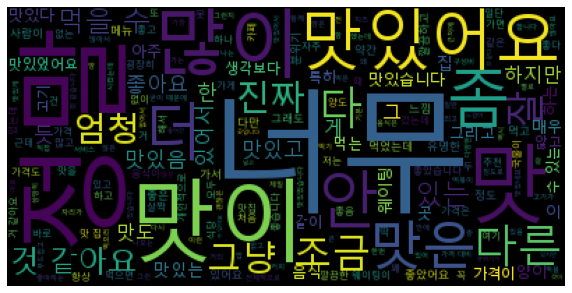

In [5]:
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [6]:
model = word2vec.Word2Vec.load('d:/data/project/text_100.model')
print('맛:',str(model.wv.most_similar(positive=['맛'])))
print('족발:',str(model.wv.most_similar(positive=['족발'])))
print('맛이 족발 유사도:',str(model.wv.similarity('맛있다','추천')))
print('이상한 키워드 찾기:',str(model.wv.doesnt_match('튀김 맛은 발냄새 오징어'.split())))

맛: [('은', 0.7271499037742615), ('.', 0.7251686453819275), ('도', 0.6631906628608704), ('이', 0.6495965719223022), ('완탕면', 0.6380391716957092), ('이다', 0.6347260475158691), ('집', 0.6331919431686401), ('는', 0.6285597085952759), ('맛있다', 0.6147164106369019), ('1', 0.6126173734664917)]
족발: [('영접', 0.6469574570655823), ('부스러지다', 0.628997802734375), ('뽕', 0.6006350517272949), ('쫄깃쫄깃하', 0.5975562930107117), ('성수', 0.5905661582946777), ('창신동', 0.577145516872406), ('스트리트', 0.5732432007789612), ('앞발', 0.5569446086883545), ('버버버', 0.5318579077720642), ('깨끗이', 0.5214951038360596)]
맛이 족발 유사도: 0.42364666
이상한 키워드 찾기: 오징어


In [15]:
model.wv.index_to_key[:5]

['하다', '.', '1', '이', '맛있다']

In [9]:
lines = f.readlines(400000)
han=Hannanum()
temp=[]
for i in range(len(lines)):
    a=lines[i].strip()
    temp.append(han.nouns(a)) 
def flatten(items):
    flatList=[]
    for elem in items:
        if type(elem)==list: 
            for e in elem: 
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList 
word_list=flatten(temp)  
word_list=pd.Series([x for x in word_list if len(x)>1])

In [10]:
word_list.value_counts().head(10)

가격     714
분위기    401
음식     400
메뉴     396
정도     331
생각     327
방문     324
사람     294
깔끔     282
커피     271
dtype: int64

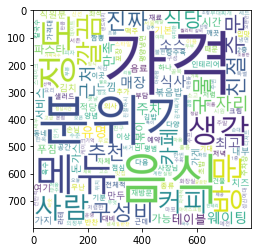

In [12]:
wordcloud=WordCloud( font_path='c:/windows/fonts/malgun.ttf', width=800,height=800,background_color='white')
import matplotlib.pyplot as plt
count=Counter(word_list)
wordcloud=wordcloud.generate_from_frequencies(count)
plt.imshow(wordcloud)
plt.show()